## DATA VISUALIZATION

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use('./deeplearning.mplstyle')

In [362]:
train_set_df = pd.read_csv("data/train.csv")
print('The sape of our training set is: ', train_set_df.shape)

The sape of our training set is:  (1460, 81)


In [363]:
display(train_set_df.head(5))
display(train_set_df.info())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

# WEEK 1: linear regression with one variable

First try with the knowledge of the week one. I studied linear regression and the gradient descent

## Data reduction to one variable

In [395]:
y_train = train_set_df['SalePrice']
x_train = train_set_df['TotalBsmtSF']

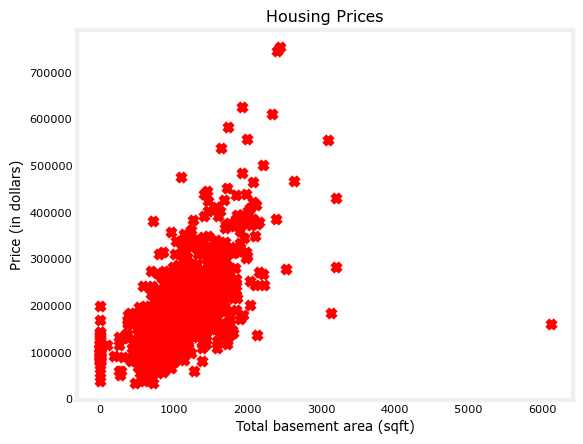

In [396]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in dollars)')
# Set the x-axis label
plt.xlabel('Total basement area (sqft)')
plt.show()

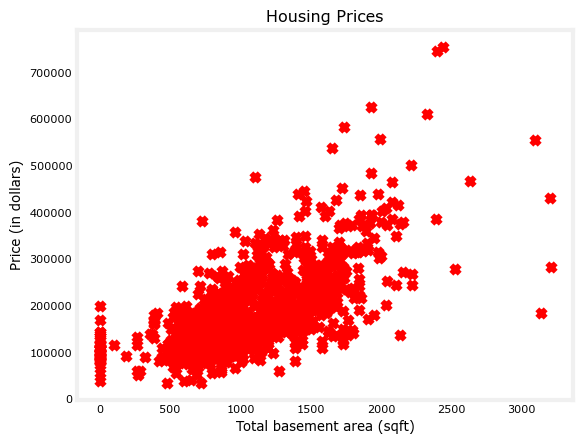

In [408]:
# Clean extreme data
y_train = y_train[x_train.le(4000)].reset_index(drop=True)
x_train = x_train[x_train.le(4000)].reset_index(drop=True)


# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in dollars)')
# Set the x-axis label
plt.xlabel('Total basement area (sqft)')
plt.show()

In [409]:
def compute_cost(x, y, w, b):
    m = len(x)
    cost = 0
    for i in range(m):
        cost += (w * x[i] + b - y[i])**2
    total_cost = 1/(2*m)*cost
    return total_cost


In [410]:
def compute_gradient(x, y, w, b):
    m = len(x)
    djdw = 0
    djdb = 0
    for i in range(m):
        f = w * x[i] + b
        djdw =+ (f - y[i]) * x[i]
        djdb =+ (f - y[i])
    djdw_total = djdw/m
    djdb_total = djdb/m
    return djdw_total, djdb_total

In [411]:
def gradient_descent(x, y, w_init, b_init, alpha, error, cost_function, compute_gradient):
    J_history = []
    w_history = []
    b_history = []
    iterations = 0
    w = w_init
    b = b_init
    iterate = True
    J_history.append(cost_function(x, y, w , b))
    w_history.append(w)
    b_history.append(b)
    while iterate == True:
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J_history.append(cost_function(x, y, w , b))
        w_history.append(w)
        b_history.append(b)
        iterations += 1
        if iterations % 10 == 0:
            print(f"Iteration {iterations:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
        if abs(J_history[-1] - J_history[-2]) < error:
            iterate = False
    return w, b, J_history, w_history, b_history


In [509]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
error = 1e-5
tmp_alpha = 1.0e-4
# run gradient descent
w_final, b_final, J_hist, w_hist, b_hist= gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    error, compute_cost, compute_gradient)
print(w_final, b_final)

Iteration   10: Cost 6.66e+09  dj_dw: -4.534e+04, dj_db: -3.610e+01   w:  8.004e+01, b: 6.37250e-02
Iteration   20: Cost 4.30e+09  dj_dw: -1.444e+04, dj_db: -1.150e+01   w:  1.055e+02, b: 8.40183e-02
Iteration   30: Cost 3.72e+09  dj_dw: -4.598e+03, dj_db: -3.661e+00   w:  1.136e+02, b: 9.04807e-02
Iteration   40: Cost 3.55e+09  dj_dw: -1.464e+03, dj_db: -1.166e+00   w:  1.162e+02, b: 9.25386e-02
Iteration   50: Cost 3.50e+09  dj_dw: -4.663e+02, dj_db: -3.712e-01   w:  1.171e+02, b: 9.31940e-02
Iteration   60: Cost 3.48e+09  dj_dw: -1.485e+02, dj_db: -1.182e-01   w:  1.173e+02, b: 9.34027e-02
Iteration   70: Cost 3.48e+09  dj_dw: -4.728e+01, dj_db: -3.765e-02   w:  1.174e+02, b: 9.34691e-02
Iteration   80: Cost 3.48e+09  dj_dw: -1.506e+01, dj_db: -1.199e-02   w:  1.174e+02, b: 9.34903e-02
Iteration   90: Cost 3.48e+09  dj_dw: -4.795e+00, dj_db: -3.818e-03   w:  1.174e+02, b: 9.34970e-02
Iteration  100: Cost 3.48e+09  dj_dw: -1.527e+00, dj_db: -1.216e-03   w:  1.174e+02, b: 9.34992e-02


In [510]:
compute_cost(x_train, y_train, w_final, b_final)

np.float64(3475722980.450909)

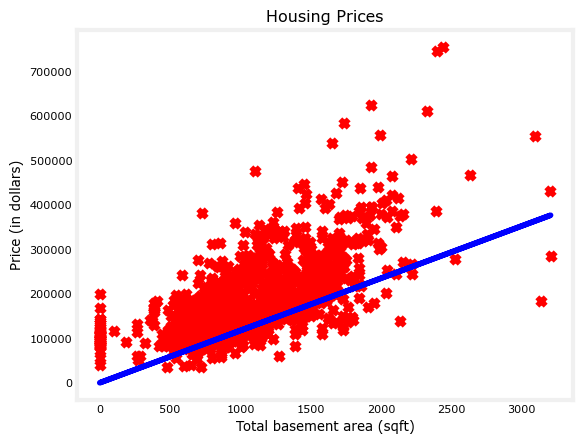

In [511]:
y = []
for x in x_train:
    y.append(w_final * x + b_final)
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
plt.plot(x_train, y, c = 'b')
plt.title("Housing Prices")
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in dollars)')
# Set the x-axis label
plt.xlabel('Total basement area (sqft)')
plt.show()

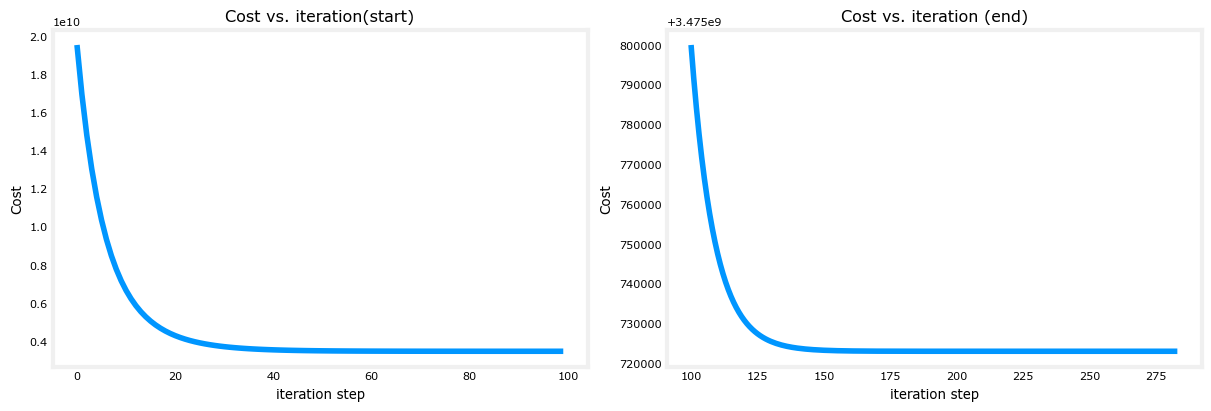

In [512]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()
